# Funcionamento da rede

<img src="rede_neural.jpg" />

In [1]:
import tensorflow
from tensorflow import keras

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
dataset = keras.datasets.fashion_mnist

((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

imagens_treino = imagens_treino / float(255)

In [3]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5337 - accuracy: 0.8074 - val_loss: 0.3930 - val_accuracy: 0.8550
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3999 - accuracy: 0.8528 - val_loss: 0.3929 - val_accuracy: 0.8483
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3675 - accuracy: 0.8643 - val_loss: 0.3414 - val_accuracy: 0.8776
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3451 - accuracy: 0.8732 - val_loss: 0.3608 - val_accuracy: 0.8702
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3278 - accuracy: 0.8779 - val_loss: 0.3347 - val_accuracy: 0.8802
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3147 - accuracy: 0.8827 - val_loss: 0.3387 - val_accuracy: 0.8758
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3037 - accuracy: 0.8861 - val_loss: 0.3368 - val_accuracy:

# Resumo do modelo

In [4]:
sumario_do_modelo = modelo.summary()

sumario_do_modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


É possível observar que no primeiro dense temos 200960 parâmetros. Se multiplicarmos 784 da camada flatten por 256 da primeira dense temos 200.704... de onde vem os outros 256 parâmetros dessa camada?

Esses outros 256 seriam como pesos nessa camada que são moldados a medida que treinamos.

# Pesos

In [5]:
pesos_camada_1 = modelo.layers[1].get_weights()

pesos_camada_1

[array([[ 0.03015021, -0.01972636,  0.04369548, ...,  0.05521436,
         -0.05089135, -0.07780948],
        [ 0.02797533, -0.0114601 ,  0.08139125, ..., -0.0382046 ,
         -0.01839068, -0.04651351],
        [-0.06990895, -0.02395104,  0.01039242, ..., -0.03589765,
          0.03796642, -0.11130533],
        ...,
        [ 0.06531568, -0.08033355, -0.1480844 , ..., -0.0336173 ,
         -0.03399583, -0.02859576],
        [ 0.00619973, -0.19480087, -0.13396753, ...,  0.01001712,
         -0.01103124, -0.20683572],
        [ 0.0906656 , -0.13873813,  0.02214294, ...,  0.01764898,
         -0.06763382, -0.21789575]], dtype=float32),
 array([ 0.1358173 ,  0.2849851 ,  0.17133908, -0.01037397,  0.18014938,
         0.06608928,  0.35319948, -0.03716317, -0.13207467,  0.38412374,
        -0.02050947,  0.6289852 , -0.19564202,  0.22110362,  0.01158471,
        -0.08169031,  0.19123362,  0.25836053, -0.14206211, -0.23628311,
        -0.03636708, -0.01215509,  0.32875144,  0.3921574 ,  0.156

In [6]:
len(modelo.layers[1].get_weights()[0])

784

## Viés

E o que há na coordenada 1 do array retornado? na coordenada 1 se encontram os vieses.

In [7]:
vieses_camada_1 = modelo.layers[1].get_weights()[1]

vieses_camada_1

array([ 0.1358173 ,  0.2849851 ,  0.17133908, -0.01037397,  0.18014938,
        0.06608928,  0.35319948, -0.03716317, -0.13207467,  0.38412374,
       -0.02050947,  0.6289852 , -0.19564202,  0.22110362,  0.01158471,
       -0.08169031,  0.19123362,  0.25836053, -0.14206211, -0.23628311,
       -0.03636708, -0.01215509,  0.32875144,  0.3921574 ,  0.15606043,
       -0.00515226,  0.34249264,  0.08948664, -0.00668161, -0.3297207 ,
        0.35169592, -0.15332672,  0.14609906,  0.0033304 , -0.26818493,
        0.2773301 , -0.3742712 , -0.05973265,  0.04680966,  0.10237408,
        0.15409662,  0.06138068, -0.02184693,  0.20517252, -0.25359327,
       -0.01464982, -0.26086777, -0.09717863, -0.01966419,  0.02069554,
        0.0975821 ,  0.05068081, -0.28618968,  0.13284463, -0.18598317,
        0.23463985,  0.10439906,  0.02961439,  0.06525001, -0.28794616,
        0.03652802,  0.07239613, -0.01596973, -0.13872564,  0.34460703,
        0.13200387,  0.10301881, -0.01197574,  0.08664816, -0.27

In [8]:
len(modelo.layers[1].get_weights()[1])

256

Aqueles outros 256 pesos adicionados a nossa conta gerando 200960 eram vieses

Os vieses mostram ao modelo o quão próximo chegou da resposta

## Zerando os pesos

In [9]:
pesos_camada_1[0].shape

(784, 256)

In [10]:
pesos_camada_1_zerados = np.zeros(pesos_camada_1[0].shape)

In [11]:
modelo.layers[1].set_weights([pesos_camada_1_zerados, vieses_camada_1])

In [12]:
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 0.1358173 ,  0.2849851 ,  0.17133908, -0.01037397,  0.18014938,
         0.06608928,  0.35319948, -0.03716317, -0.13207467,  0.38412374,
        -0.02050947,  0.6289852 , -0.19564202,  0.22110362,  0.01158471,
        -0.08169031,  0.19123362,  0.25836053, -0.14206211, -0.23628311,
        -0.03636708, -0.01215509,  0.32875144,  0.3921574 ,  0.15606043,
        -0.00515226,  0.34249264,  0.08948664, -0.00668161, -0.3297207 ,
         0.35169592, -0.15332672,  0.14609906,  0.0033304 , -0.26818493,
         0.2773301 , -0.3742712 , -0.05973265,  0.04680966,  0.10237408,
         0.15409662,  0.06138068, -0.02184693,  0.20517252, -0.25359327,
        -0.01464982, -0.26086777, -0.09717863, -0.01966419,  0.02069554,
      

In [13]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5444 - accuracy: 0.8003 - val_loss: 0.4402 - val_accuracy: 0.8298
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4069 - accuracy: 0.8496 - val_loss: 0.3714 - val_accuracy: 0.8649
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3775 - accuracy: 0.8597 - val_loss: 0.3474 - val_accuracy: 0.8705
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3533 - accuracy: 0.8698 - val_loss: 0.3577 - val_accuracy: 0.8690
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3415 - accuracy: 0.8725 - val_loss: 0.3265 - val_accuracy: 0.8839
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3237 - accuracy: 0.8790 - val_loss: 0.3334 - val_accuracy: 0.8802
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3139 - accuracy: 0.8816 - val_loss: 0.3184 - val_accuracy:

In [14]:
historico = pd.DataFrame(historico.history)

historico

,loss,accuracy,val_loss,val_accuracy
0,0.544430,0.800313,0.440205,0.829833
1,0.406934,0.849646,0.371431,0.864917
2,0.377521,0.859688,0.347357,0.870500
3,0.353294,0.869750,0.357661,0.869000
4,0.341492,0.872458,0.326542,0.883917
5,0.323694,0.879000,0.333366,0.880250
6,0.313854,0.881562,0.318354,0.883167
7,0.307115,0.885271,0.315572,0.884917
8,0.295455,0.888083,0.318893,0.884083
9,0.289916,0.891708,0.311514,0.885917


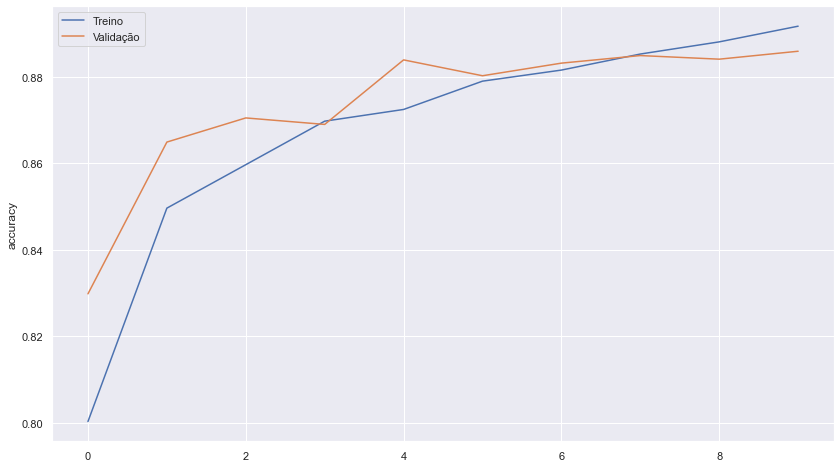

In [15]:
sns.set_theme()
plt.figure(figsize=(14, 8))

sns.lineplot(data=historico, x=historico.index.values, y='accuracy')
sns.lineplot(data=historico, x=historico.index.values, y='val_accuracy')

plt.legend(['Treino', 'Validação'])

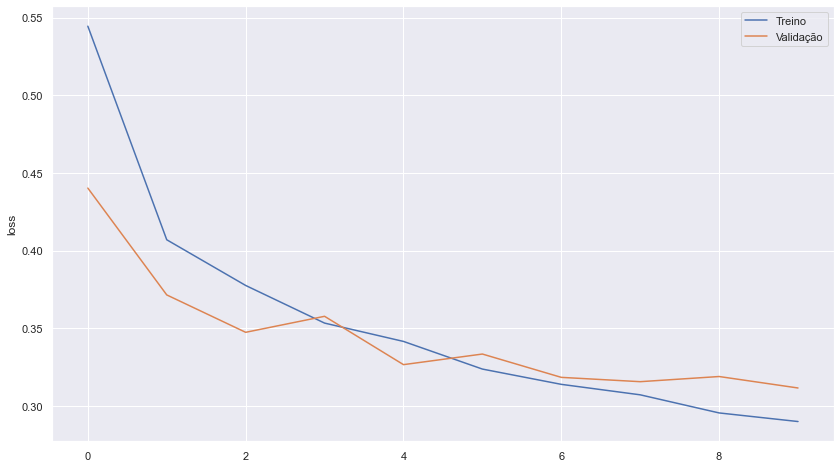

In [16]:
sns.set_theme()
plt.figure(figsize=(14, 8))

sns.lineplot(data=historico, x=historico.index.values, y='loss')
sns.lineplot(data=historico, x=historico.index.values, y='val_loss')

plt.legend(['Treino', 'Validação'])

A ideia de inicializar os pesos com 0 é de manter a simetria da rede. Mas iniciar com 0 não é muito adequado pois sinaliza os mesmos pesos, o que nem sempre é verdade

## Gerando pesos aleatórios

In [17]:
pesos_camada_1[0].shape

(784, 256)

In [18]:
pesos_camada_1_aleatorios = np.random.rand(784, 256)

In [19]:
pesos_camada_1_aleatorios

array([[0.4412272 , 0.2113277 , 0.95589591, ..., 0.76929414, 0.45031216,
        0.85650276],
       [0.07063943, 0.44883434, 0.34129695, ..., 0.51083495, 0.00585149,
        0.75757342],
       [0.06734533, 0.34905064, 0.83917448, ..., 0.16052622, 0.56692395,
        0.31412481],
       ...,
       [0.20447238, 0.82253685, 0.47190001, ..., 0.44232291, 0.14690866,
        0.46711449],
       [0.6527777 , 0.39533942, 0.43907968, ..., 0.98079095, 0.31579119,
        0.30685193],
       [0.05239333, 0.78098867, 0.85238901, ..., 0.50260889, 0.767264  ,
        0.5247028 ]])

In [20]:
modelo.layers[1].set_weights([pesos_camada_1_aleatorios, vieses_camada_1])

In [21]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 22.0227 - accuracy: 0.0997 - val_loss: 2.3038 - val_accuracy: 0.0983
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3188 - accuracy: 0.0976 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3046 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3058 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1013
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3046 - accuracy: 0.1014 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3034 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy

In [22]:
historico = pd.DataFrame(historico.history)

historico

,loss,accuracy,val_loss,val_accuracy
0,22.022734,0.099688,2.303839,0.098333
1,2.318751,0.097625,2.302764,0.095750
2,2.304626,0.098458,2.302758,0.098333
3,2.305777,0.098187,2.302684,0.101250
4,2.304564,0.101438,2.302894,0.095750
5,2.303398,0.098750,2.302680,0.095750
6,2.302727,0.100396,2.302747,0.100500
7,2.304618,0.100104,2.302665,0.098333
8,2.302693,0.099188,2.302752,0.095750
9,2.302864,0.098521,2.302691,0.095750


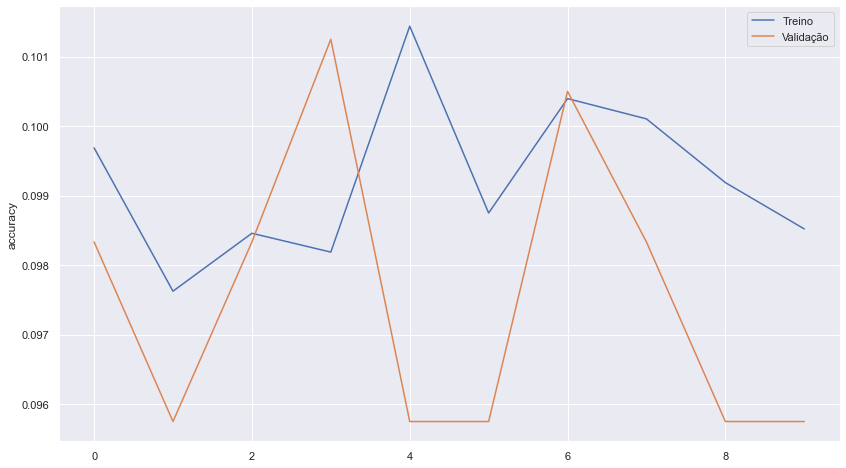

In [23]:
sns.set_theme()
plt.figure(figsize=(14, 8))

sns.lineplot(data=historico, x=historico.index.values, y='accuracy')
sns.lineplot(data=historico, x=historico.index.values, y='val_accuracy')

plt.legend(['Treino', 'Validação'])

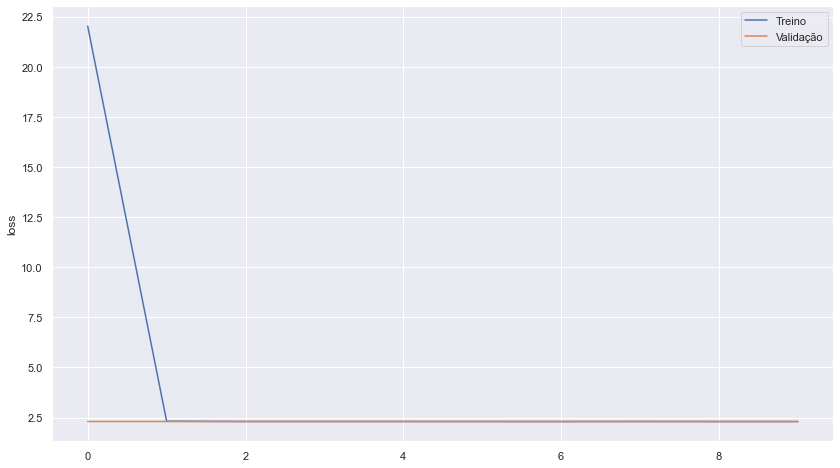

In [24]:
sns.set_theme()
plt.figure(figsize=(14, 8))

sns.lineplot(data=historico, x=historico.index.values, y='loss')
sns.lineplot(data=historico, x=historico.index.values, y='val_loss')

plt.legend(['Treino', 'Validação'])

O que acontece é que quando pegamos valores randomicos eles podem ficar tão pequenos nos movimentos de fowardpropagation e de backpropagation que pode fazer os valores sumirem, podendo matar as redes.

Outra posibilidade é dos valores ficarem tão grandes a ponto de não ativarem a Relu ded maneira que o modelo aprenda

# Entendendo configuração

In [25]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

In [26]:
pd.DataFrame(modelo.get_config())

,name,layers
0,sequential,"{'class_name': 'InputLayer', 'config': {'batch..."
1,sequential,"{'class_name': 'Flatten', 'config': {'name': '..."
2,sequential,"{'class_name': 'Dense', 'config': {'name': 'de..."
3,sequential,"{'class_name': 'Dropout', 'config': {'name': '..."
4,sequential,"{'class_name': 'Dense', 'config': {'name': 'de..."
5,sequential,"{'class_name': 'Dense', 'config': {'name': 'de..."


O que inicializa nossos pesos é o GlorotUniform e outra coisa que ajuda ao não desbalancear tantos os pesos é a Relu

## Zerando vieses

In [27]:
vieses_camada_1.shape

(256,)

In [28]:
vieses_camada_1_zerados = np.zeros(vieses_camada_1.shape)

In [29]:
modelo.layers[1].set_weights([pesos_camada_1[0], vieses_camada_1_zerados])

In [30]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2869 - accuracy: 0.8937 - val_loss: 0.3390 - val_accuracy: 0.8808
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2690 - accuracy: 0.8984 - val_loss: 0.3275 - val_accuracy: 0.8800
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2629 - accuracy: 0.9001 - val_loss: 0.3027 - val_accuracy: 0.8884
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2548 - accuracy: 0.9041 - val_loss: 0.3035 - val_accuracy: 0.8945
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2475 - accuracy: 0.9059 - val_loss: 0.3150 - val_accuracy: 0.8934
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2417 - accuracy: 0.9064 - val_loss: 0.3349 - val_accuracy: 0.8848
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2403 - accuracy: 0.9085 - val_loss: 0.3098 - val_accuracy:

In [31]:
historico = pd.DataFrame(historico.history)

historico

,loss,accuracy,val_loss,val_accuracy
0,0.286925,0.893687,0.339030,0.880750
1,0.268974,0.898354,0.327458,0.880000
2,0.262912,0.900125,0.302664,0.888417
3,0.254780,0.904104,0.303514,0.894500
4,0.247455,0.905896,0.315032,0.893417
5,0.241680,0.906396,0.334948,0.884750
6,0.240281,0.908521,0.309810,0.889333
7,0.236743,0.909875,0.312306,0.891583
8,0.231362,0.912917,0.314618,0.890417
9,0.227635,0.914208,0.314659,0.891167


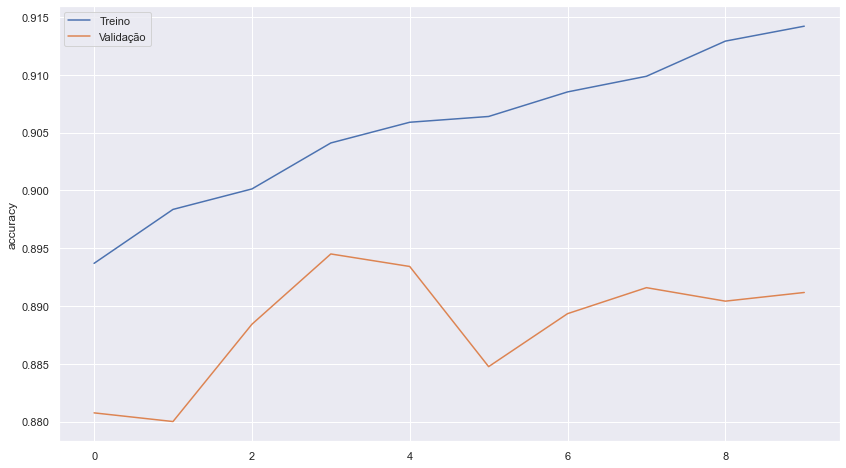

In [32]:
sns.set_theme()
plt.figure(figsize=(14, 8))

sns.lineplot(data=historico, x=historico.index.values, y='accuracy')
sns.lineplot(data=historico, x=historico.index.values, y='val_accuracy')

plt.legend(['Treino', 'Validação'])

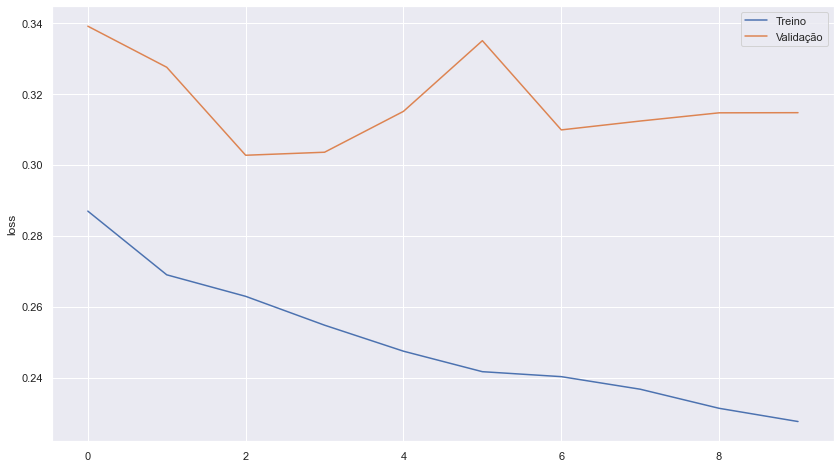

In [33]:
sns.set_theme()
plt.figure(figsize=(14, 8))

sns.lineplot(data=historico, x=historico.index.values, y='loss')
sns.lineplot(data=historico, x=historico.index.values, y='val_loss')

plt.legend(['Treino', 'Validação'])

Trocar os valores dos pesos, no geral, impacta mais

Ainda assim, é possível que a rede venha a "morrer" por conta dos vieses

O keras zera os vieses no fundo dos panos

- Os vieses seriam as diantâncias entre os objetos e a curva que os divide
- Os pesos serviriam para cada vez mais ir ajustando a curva

Saída = ReLU((entrada * peso) + viés)

Output = activation((input * kernel) + bias)

## Gradiente descendente

Tem como objetivo encontrar a menor perda para a rede

Ás vezes quando um algoritmo não evolui, pode ser por conta de um mínimo local. Quando estamos buscando a menor perda, queremos encontrar o mínimo global.

O gradiente descendente é calculado após o algoritmo passar por todos os exemplos de treino, o que demora bastante. O que pode facilitar encontrar o mínimo global é aleatorizar o processo.

Como chegar no mínimo global? GRADIENTE DESCENDENTE ESTOCÁSTICO

 ### Gradiente Descendente Estocástico
 
 - É um otimizador conhecido como SGD
 
 Qual a diferença do ADAM ara o SGD?
 - ADAM: adaptative moment estimation
 - SGD: stocastic gradient descendent
 
 Quando o modelo está indo para o melhor resultado é chamado de convergência
 
 há ajustes que podemos fazer para chegarmos ainda mais rápido na convergência
 
 Tudo o que passamos de parâmetro antes do treinamento do modelo é chamado de hiperparâmetro

In [36]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#learning_rate: aumentar a taxa faz ele ir rápido demais e perder informação

adam = keras.optimizers.Adam(learning_rate=0.001)

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.4417 - accuracy: 0.5642 - val_loss: 0.8891 - val_accuracy: 0.7189
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8374 - accuracy: 0.7279 - val_loss: 0.6878 - val_accuracy: 0.7722
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7023 - accuracy: 0.7691 - val_loss: 0.6114 - val_accuracy: 0.7916
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6323 - accuracy: 0.7887 - val_loss: 0.5641 - val_accuracy: 0.8100
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5882 - accuracy: 0.8019 - val_loss: 0.5330 - val_accuracy: 0.8192
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5565 - accuracy: 0.8132 - val_loss: 0.5093 - val_accuracy: 0.8276
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5341 - accuracy: 0.8199 - val_loss: 0.4938 - val_accuracy:

In [41]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#learning_rate: aumentar a taxa faz ele ir rápido demais e perder informação

adam = keras.optimizers.Adam(learning_rate=0.002)

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#batch_size = diminui o número de imagens para treino por vez

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2, batch_size=480)

Epoch 1/10
100/100 [==============================] - 3s 22ms/step - loss: 0.6661 - accuracy: 0.7644 - val_loss: 0.4495 - val_accuracy: 0.8402
Epoch 2/10
100/100 [==============================] - 2s 18ms/step - loss: 0.4208 - accuracy: 0.8497 - val_loss: 0.3892 - val_accuracy: 0.8556
Epoch 3/10
100/100 [==============================] - 2s 19ms/step - loss: 0.3739 - accuracy: 0.8653 - val_loss: 0.3813 - val_accuracy: 0.8589
Epoch 4/10
100/100 [==============================] - 2s 19ms/step - loss: 0.3550 - accuracy: 0.8702 - val_loss: 0.3456 - val_accuracy: 0.8763
Epoch 5/10
100/100 [==============================] - 2s 18ms/step - loss: 0.3301 - accuracy: 0.8781 - val_loss: 0.3434 - val_accuracy: 0.8756
Epoch 6/10
100/100 [==============================] - 2s 18ms/step - loss: 0.3161 - accuracy: 0.8836 - val_loss: 0.3325 - val_accuracy: 0.8783
Epoch 7/10
100/100 [==============================] - 2s 19ms/step - loss: 0.3044 - accuracy: 0.8889 - val_loss: 0.3130 - val_accuracy: 0.8884

In [42]:
historico = pd.DataFrame(historico.history)

historico

,loss,accuracy,val_loss,val_accuracy
0,0.666121,0.764375,0.449467,0.840167
1,0.420840,0.849667,0.389231,0.855583
2,0.373885,0.865333,0.381325,0.858917
3,0.355035,0.870229,0.345578,0.876333
4,0.330097,0.878083,0.343372,0.875583
5,0.316124,0.883583,0.332508,0.878333
6,0.304355,0.888937,0.313031,0.888417
7,0.293209,0.891292,0.317901,0.881833
8,0.287427,0.893458,0.318618,0.882417
9,0.278582,0.896937,0.323432,0.884417


In [51]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]

In [55]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(learning_rate=0.002)

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       epochs=10, validation_split=0.2, batch_size=480, 
                       callbacks=callbacks)

Epoch 1/10
100/100 [==============================] - 3s 21ms/step - loss: 0.6371 - accuracy: 0.7735 - val_loss: 0.4324 - val_accuracy: 0.8440
Epoch 2/10
100/100 [==============================] - 2s 18ms/step - loss: 0.4205 - accuracy: 0.8506 - val_loss: 0.3766 - val_accuracy: 0.8630
